Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
# Download Instacart data (196 MB)
%cd /content/
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

# Unzip to 681.1 MB of data
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

/content
--2020-09-11 00:06:31--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.77.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.77.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  57.2MB/s    in 3.4s    

2020-09-11 00:06:35 (57.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2

In [13]:
from os import listdir
import pandas as pd

# Go into the new folder. Still works if you're already there
%cd /content/instacart_2017_05_01

# Make a list of dataframe names from present files
df_names = [file[:-4] for file in listdir() if '._' not in file]
print('Dataframe names =',df_names)

# Reads in all dataframes into df
df = { df_name : pd.read_csv(df_name+'.csv') for df_name in df_names}
print('Loaded Dataframes:',list(df.keys()))

/content/instacart_2017_05_01
Dataframe names = ['order_products__prior', 'products', 'orders', 'aisles', 'order_products__train', 'departments']
Loaded Dataframes: ['order_products__prior', 'products', 'orders', 'aisles', 'order_products__train', 'departments']


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [16]:
# A fancy print loop for my dataframe dictionary
def describe_df():
  print('Dataframes in df:')
  mem_usage = 0
  for key in df.keys():
    print(key+':')
    print('columns:',list(df[key].columns))
    print('values:',list(df[key].iloc[0]))
    print('Shape:',df[key].shape)
    print()
    mem_usage += df[key].memory_usage(index=True, deep=True).sum()
  mem_usage = format(mem_usage, ',d')
  print('\nMemory Usage:',mem_usage)
describe_df()

Dataframes in df:
products:
columns: ['product_id', 'product_name', 'aisle_id', 'department_id']
values: [1, 'Chocolate Sandwich Cookies', 61, 19]
Shape: (49688, 4)

orders:
columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
values: [2539329, 1, 'prior', 1, 2, 8, nan]
Shape: (3421083, 7)

aisles:
columns: ['aisle_id', 'aisle']
values: [1, 'prepared soups salads']
Shape: (134, 2)

departments:
columns: ['department_id', 'department']
values: [1, 'frozen']
Shape: (21, 2)

order_products:
columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
values: [1, 49302, 1, 1]
Shape: (33819106, 4)


Memory Usage: 1,734,589,436


In [15]:
# combine both order_product dataframes and pop the originals
df['order_products'] = pd.concat([df.pop('order_products__train'),df.pop('order_products__prior')])
describe_df()

Dataframes in df:
products:
columns: ['product_id', 'product_name', 'aisle_id', 'department_id']
values: [1, 'Chocolate Sandwich Cookies', 61, 19]
Shape: (49688, 4)

orders:
columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
values: [2539329, 1, 'prior', 1, 2, 8, nan]
Shape: (3421083, 7)

aisles:
columns: ['aisle_id', 'aisle']
values: [1, 'prepared soups salads']
Shape: (134, 2)

departments:
columns: ['department_id', 'department']
values: [1, 'frozen']
Shape: (21, 2)

order_products:
columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
values: [1, 49302, 1, 1]
Shape: (33819106, 4)


Memory Usage: 1,734,589,436


In [43]:
# How many times were the top 10 products ordered by product name?
df['popular_products'] = df['order_products']['product_id'].value_counts().sort_values(ascending=False)

df['popular_products'] = df['product_popularity'][df['product_popularity'] > 2900]
df['popular_products'] = df['popular_products'].reset_index()
df['popular_products'].columns = ['product_id', 'n_orders']
# # top_ten = df['products'][df['products']['product_id'].isin(top_ten_ids['product_id'])]
df['popular_products'] = pd.merge(df['popular_products'], df['products'], on='product_id', how='inner') 
# # product_popularity = product_popularity.set_index(pd.Index(range(1,11)))
df['popular_products'].drop(['aisle_id','department_id'], axis=1, inplace=True)
df['popular_products'] = df['popular_products'][['product_id','product_name','n_orders']]
df['popular_products'].head(10)

,product_id,product_name,n_orders
0,24852,Banana,491291
1,13176,Bag of Organic Bananas,394930
2,21137,Organic Strawberries,275577
3,21903,Organic Baby Spinach,251705
4,47209,Organic Hass Avocado,220877
5,47766,Organic Avocado,184224
6,47626,Large Lemon,160792
7,16797,Strawberries,149445
8,26209,Limes,146660
9,27845,Organic Whole Milk,142813


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [19]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [20]:
# Probably the right method for table2 -> tidy
table2.rename_axis(index='Treatment', inplace=True)
table2.reset_index(inplace=True)
tidy = table2.melt(id_vars='Treatment',value_vars=table2.columns[1:],
                   var_name='Name',value_name='Value')
tidy = tidy[['Name','Treatment','Value']]
tidy

,Name,Treatment,Value
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [142]:
# Probably the wrong method for table2 -> tidy
# manually transpose a df
def trans(old_table):
  new_table = pd.DataFrame()
  for i, index in enumerate(old_table.index):
    row = old_table.iloc[i]
    new_table[index] = row
  return new_table

tidy = trans(table2)
tidy.rename_axis(index='Name', inplace=True)
tidy.reset_index(inplace=True)
tidy = tidy.melt(id_vars='Name', value_vars=['treatmenta','treatmentb'],
               var_name='Treatment', value_name='Value')
tidy


,Name,Treatment,Value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [21]:
# tidy -> table2

table3 = tidy.pivot_table(values=['Value'],
                          index=['Treatment'],
                          columns=['Name'])
table3.columns = table3.columns.get_level_values(1)
table3.index.name = None
table3

Name,Jane Doe,John Smith,Mary Johnson
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [22]:
import seaborn as sns
flights = sns.load_dataset('flights')
print('Shape',flights.shape)
flights.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Shape (144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [23]:
# Flights Pivot Table
flights_wide = flights.pivot_table(values='passengers', index='year',columns='month')
flights_wide.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [146]:
describe_df()

Dataframes in df:
products:
columns: ['product_id', 'product_name', 'aisle_id', 'department_id']
values: [1, 'Chocolate Sandwich Cookies', 61, 19]
Shape: (49688, 4)

orders:
columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
values: [2539329, 1, 'prior', 1, 2, 8, nan]
Shape: (3421083, 7)

aisles:
columns: ['aisle_id', 'aisle']
values: [1, 'prepared soups salads']
Shape: (134, 2)

departments:
columns: ['department_id', 'department']
values: [1, 'frozen']
Shape: (21, 2)

order_products:
columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
values: [1, 49302, 1, 1]
Shape: (33819106, 4)

popular_products:
columns: ['product_id', 'product_name', 'n_orders', 'mean_hour_of_day']
values: [24852, 'Banana', 491291, 13.393432812732168]
Shape: (2051, 4)


Memory Usage: 1,734,907,410


In [147]:
df['orders']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [148]:
df['orders']['order_id'].unique().size

3421083

In [144]:
popular_product_ids = df['popular_products']['product_id']
popular_order_products = df['order_products'][
      df['order_products']['product_id'].isin(popular_product_ids)]
popular_order_products = popular_orders_ids.unique()
print(popular_orders_ids)

[      1      36      38 ... 3421081 3421082 3421083]


In [145]:
popular_product_ids = df['orders']['product_id']
popular_orders_ids = df['order_products']['order_id'][
      df['order_products']['product_id'].isin(popular_product_ids)]
popular_orders_ids = popular_orders_ids.unique()
print(popular_orders_ids)
orders

3198522


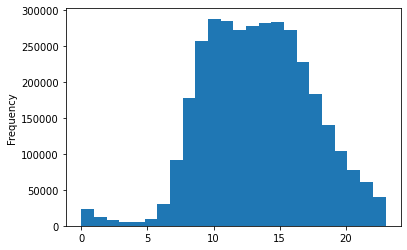

In [142]:
# what is the overall order_hour_of_day histogram?
df['orders']['order_hour_of_day'].plot.hist(bins=24);

In [129]:
# Resets 'mean_hour_of_day'
df['popular_products']['mean_hour_of_day'] = -1.0
df['popular_products']

,product_id,product_name,n_orders,mean_hour_of_day
0,24852,Banana,491291,-1.0
1,13176,Bag of Organic Bananas,394930,-1.0
2,21137,Organic Strawberries,275577,-1.0
3,21903,Organic Baby Spinach,251705,-1.0
4,47209,Organic Hass Avocado,220877,-1.0
...,...,...,...,...
2046,38533,Creamy Deluxe Macaroni Dinner Elbows & Four Ch...,2905,-1.0
2047,35734,Whole Chia Seeds,2902,-1.0
2048,21038,Organic Spelt Tortillas,2902,-1.0
2049,44787,Stage 1 - Just Prunes,2902,-1.0


In [149]:
# Which popular items are ordered latest?
# df['popular_products'] is from the top ten challenge above
# This block can be run multiple times and it will pick up where it left off

def get_order_time(i, product_id):
  mean = df['popular_products']['mean_hour_of_day'][i]
  # print(product_id,i,mean)
  if mean > 0:
    # print(mean,'is a number')
    return mean
  elif np.isnan(mean):
    # print(mean,'is fucking nan')
    order_ids = df['order_products']['order_id'][
      df['order_products']['product_id'] == product_id]
    order_nans = order_ids.isnull().sum()

    hours_of_day = df['orders']['order_hour_of_day'][
      df['orders']['order_id'].isin(order_ids)]
    # print(hours_of_day.value_counts().sort_index())
    hour_nans = hours_of_day.isnull().sum()
    mean = hours_of_day.mean()

    
    print(i,':',order_nans,'/',order_ids.size,'order nans,',hour_nans,'/',hours_of_day.size,'hour nans, and a mean of',mean)
    return mean
  else:
    order_ids = df['order_products']['order_id'][
      df['order_products']['product_id'] == product_id]
    hours_of_day = df['orders']['order_hour_of_day'][
      df['orders']['order_id'].isin(order_ids)]
    print(i,':',mean,'>',hours_of_day.mean())
    return hours_of_day.mean()


for i, product_id in enumerate(df['popular_products']['product_id']):
  df['popular_products'].at[i, 'mean_hour_of_day'] = get_order_time(i, product_id)

# df['popular_products']['mean_hour_of_day'] = df['popular_products']['product_id'].apply(get_order_time)
# df['popular_products']
# top_ten = df['products'][df['products']['product_id'].isin(top_ten_ids['product_id'])]
# top_ten = pd.merge(top_ten_ids, df['products'], on ='product_id', how ='inner') 
# top_ten = top_ten.set_index(pd.Index(range(1,11)))
# top_ten.drop(['aisle_id','department_id'], axis=1, inplace=True)
# top_ten = top_ten[['product_id','product_name','n_orders']]
# top_ten

863 : -1.0 > 13.422066014669927
864 : -1.0 > 13.302048303271171
865 : -1.0 > 13.312232415902141
866 : -1.0 > 13.524356617647058
867 : -1.0 > 13.284860557768924
868 : -1.0 > 13.564610190300797
869 : -1.0 > 13.295653509445554
870 : -1.0 > 13.374865570748195
871 : -1.0 > 12.374538745387454
872 : -1.0 > 13.693563289190022
873 : -1.0 > 13.684965304548959
874 : -1.0 > 13.621721690836162
875 : -1.0 > 13.253703703703703
876 : -1.0 > 13.271601114896253
877 : -1.0 > 13.403375658098483
878 : -1.0 > 14.394912362339072
879 : -1.0 > 13.38302823456407
880 : -1.0 > 13.338511729066335
881 : -1.0 > 13.330017099331572
882 : -1.0 > 13.6436799501868
883 : -1.0 > 13.433759351620948
884 : -1.0 > 14.268840692775784
885 : -1.0 > 13.737894407997501
886 : -1.0 > 13.203093266677081
887 : -1.0 > 13.902297952165078
888 : -1.0 > 13.33589221369262
889 : -1.0 > 12.990755249138202
890 : -1.0 > 13.213331237226852
891 : -1.0 > 13.235025939317717
892 : -1.0 > 13.909162468513854
893 : -1.0 > 13.458714150646076
894 : -1.0 >

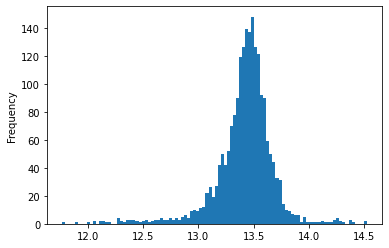

In [152]:
df['popular_products']['mean_hour_of_day'].plot.hist(bins=100);

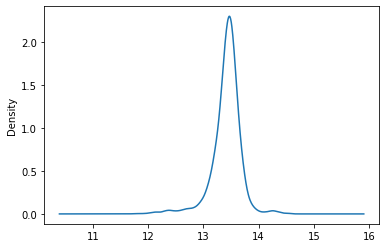

In [164]:
df['popular_products']['mean_hour_of_day'].plot.density();

In [162]:
# And the 25 latest ordered products... are indeed ice cream and pizza
df['popular_products'] = df['popular_products'].sort_values(by=['mean_hour_of_day'], ascending=False)
df['popular_products'].head(50)

,product_id,product_name,n_orders,mean_hour_of_day
1985,30668,Half Baked Frozen Yogurt,2983,14.526986
1891,45541,The Tonight Dough™ Ice Cream,3137,14.526299
878,45681,Americone Dream® Ice Cream,6447,14.394912
914,46175,Half Baked® Ice Cream,6222,14.388942
1870,14335,Phish Food® Ice Cream,3177,14.373308
1093,38374,Milk and Cookies Ice Cream,5223,14.369711
1887,38003,Sicilian Pistachio,3146,14.306421
1296,28682,Chocolate Peanut Butter Cup Gelato,4511,14.303480
1037,48523,Birthday Cake Light Ice Cream,5462,14.292018
1300,47993,Cherry Garcia Ice Cream,4495,14.270300


In [161]:
# Save popular_products to a zip file
%cd \content\
compression_opts = dict(method='zip',
                        archive_name='popular_products.csv')  
df['popular_products'].to_csv('popular_products.zip', index=False,
          compression=compression_opts)
# !wget 'popular_products.zip'

In [ ]:
# Load popular_products back from the zip file
%cd /content/instacart_2017_05_01
from google.colab import files
uploaded = files.upload()

!unzip popular_products.zip
df['popular_products'] = pd.read_csv('popular_products.csv')

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####